<a href="https://colab.research.google.com/github/iraj259/Machine-Learning/blob/main/OnlinePaymentsFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fraudDetection.csv')

**EDA**

In [3]:
df.shape

(450130, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450130 entries, 0 to 450129
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            450130 non-null  int64  
 1   type            450130 non-null  object 
 2   amount          450130 non-null  float64
 3   nameOrig        450130 non-null  object 
 4   oldbalanceOrg   450129 non-null  float64
 5   newbalanceOrig  450129 non-null  float64
 6   nameDest        450129 non-null  object 
 7   oldbalanceDest  450129 non-null  float64
 8   newbalanceDest  450129 non-null  float64
 9   isFraud         450129 non-null  float64
 10  isFlaggedFraud  450129 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.8+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,450130.000000,4.501300e+05,4.501290e+05,4.501290e+05,4.501290e+05,4.501290e+05,450129.000000,450129.0
mean,13.325744,1.697184e+05,9.014724e+05,9.211543e+05,9.836562e+05,1.170967e+06,0.000489,0.0
std,3.474417,2.784657e+05,2.962480e+06,2.999785e+06,2.344390e+06,2.527062e+06,0.022102,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.351239e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.210154e+04,1.823413e+04,0.000000e+00,1.132455e+05,2.204367e+05,0.000000,0.0
75%,16.000000,2.267426e+05,1.721076e+05,2.128799e+05,8.919075e+05,1.210652e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [6]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [7]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
237838,14,PAYMENT,17900.04,C799313975,77136.84,59236.80,M1134515037,0.00,0.00,0.0,0.0
52678,9,PAYMENT,15538.04,C326570301,45265.00,29726.96,M2094588475,0.00,0.00,0.0,0.0
338588,16,CASH_OUT,355520.78,C760398018,136407.00,0.00,C1721246847,2835970.39,3351479.54,0.0,0.0
76632,10,PAYMENT,31562.09,C1265252231,5332.00,0.00,M2056619831,0.00,0.00,0.0,0.0
401902,18,CASH_OUT,133464.44,C1298757903,0.00,0.00,C998757677,694984.00,1189316.26,0.0,0.0


In [9]:
df = df.drop(["isFlaggedFraud", "nameOrig", "nameDest"], axis=1)


In [10]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [11]:
df = df.dropna(subset=["isFraud"])


In [12]:
df.isnull().sum()


,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


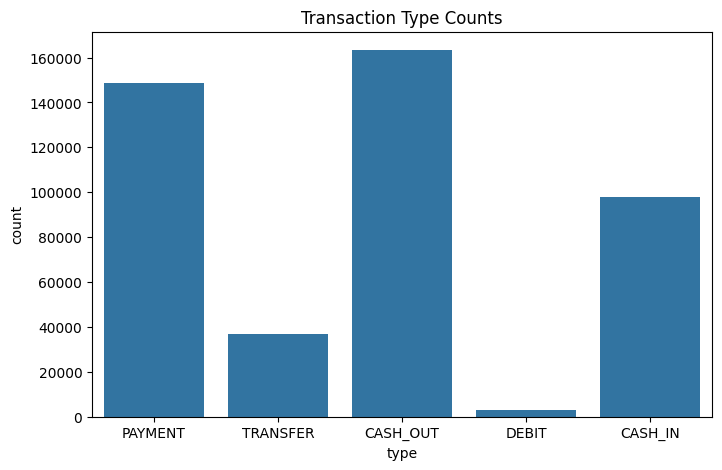

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title("Transaction Type Counts")
plt.show()

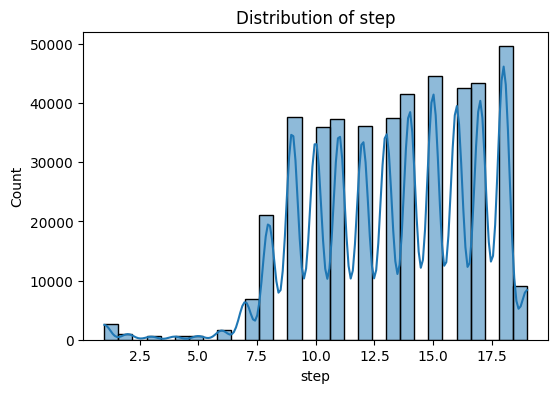

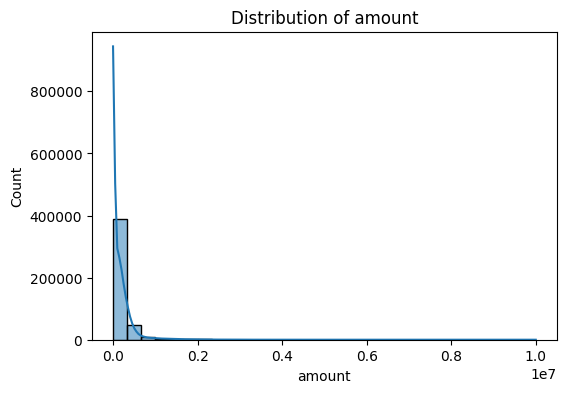

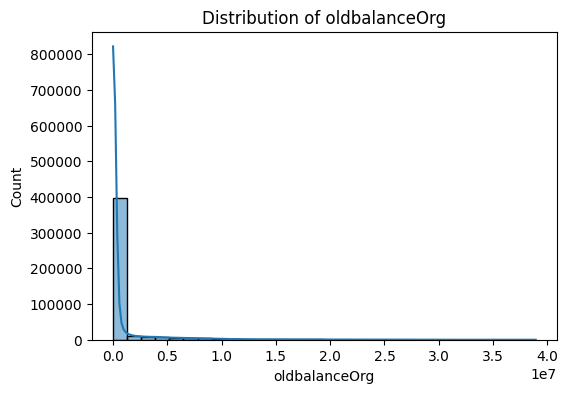

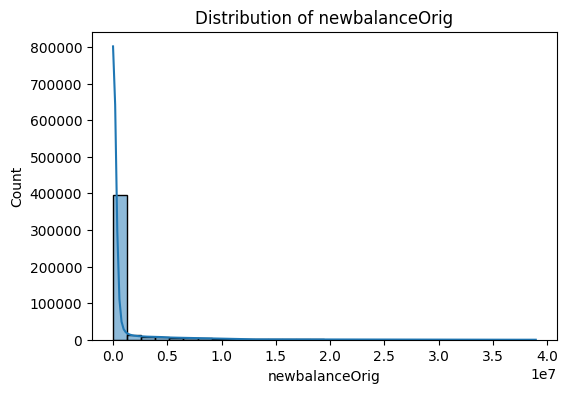

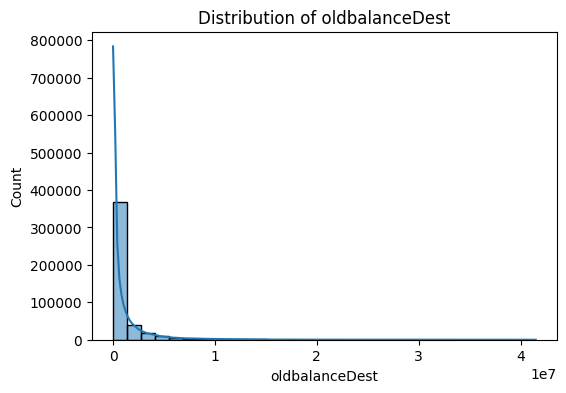

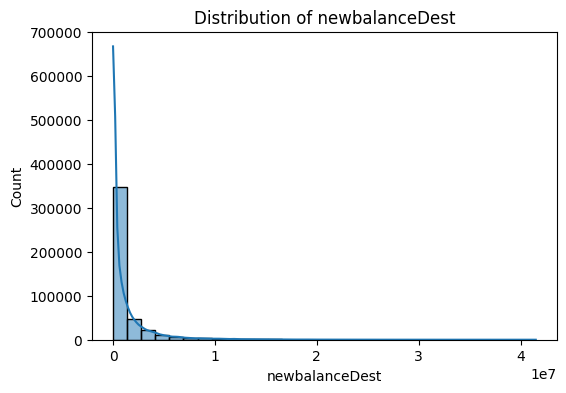

In [14]:
numeric_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


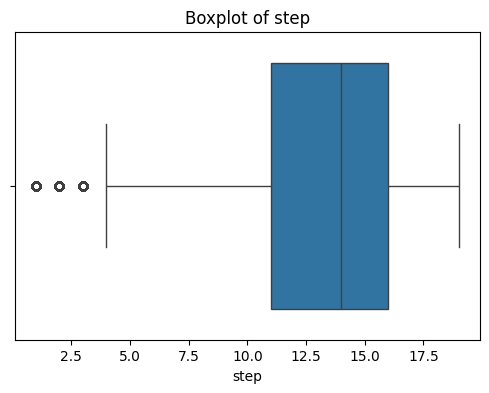

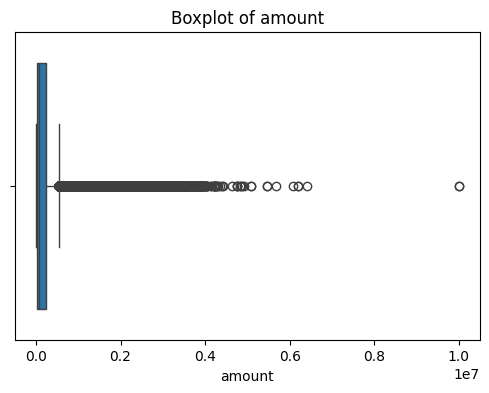

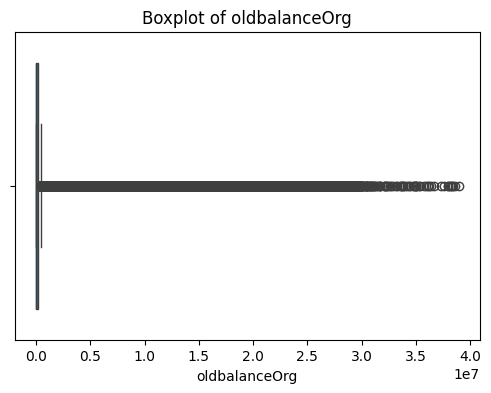

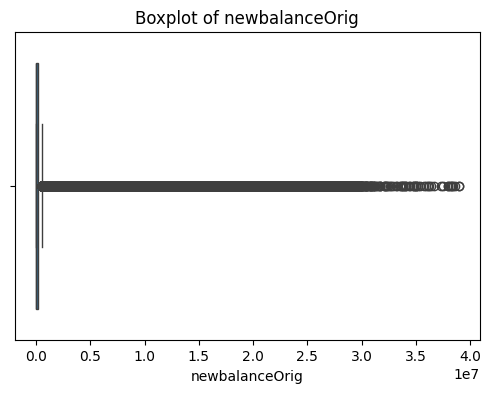

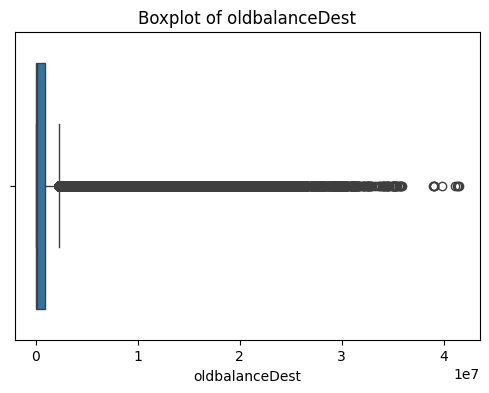

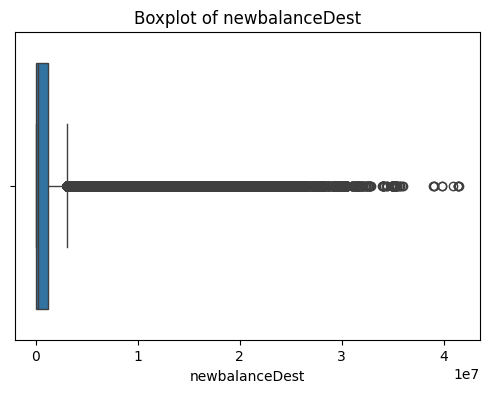

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Feature Engineering**

In [16]:
# Difference between old and new balances
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']


In [17]:
# Flag when origin balance does not change but money is sent
df['orig_balance_zero'] = np.where((df['oldbalanceOrg'] > 0) & (df['orig_balance_diff'] == 0), 1, 0)

# Flag when destination balance does not increase after receiving money
df['dest_balance_zero'] = np.where((df['amount'] > 0) & (df['dest_balance_diff'] == 0), 1, 0)


In [18]:
# Avoid log(0) by adding 1
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['log_newbalanceOrig'] = np.log1p(df['newbalanceOrig'])
df['log_oldbalanceDest'] = np.log1p(df['oldbalanceDest'])
df['log_newbalanceDest'] = np.log1p(df['newbalanceDest'])


In [19]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [21]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_features = [
    'step', 'log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig',
    'log_oldbalanceDest', 'log_newbalanceDest',
    'orig_balance_diff', 'dest_balance_diff'
]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df[numeric_features].head()


,step,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_oldbalanceDest,log_newbalanceDest,orig_balance_diff,dest_balance_diff
0,-3.547579,-0.928257,0.766461,0.980718,-1.178636,-1.23266,0.236730,-0.286181
1,-3.547579,-1.840463,0.405651,0.653137,-1.178636,-1.23266,0.172777,-0.286181
2,-3.547579,-3.116896,-0.419970,-0.877748,-1.178636,-1.23266,0.159279,-0.286181
3,-3.547579,-3.116896,-0.419970,-0.877748,0.322291,-1.23266,0.159279,-0.318544
4,-3.547579,-0.834779,0.521974,0.720263,-1.178636,-1.23266,0.251393,-0.286181
